# Analisi Esplorativa dei Dati (EDA) per il Trading Algoritmico

## Introduzione
L'Analisi Esplorativa dei Dati (EDA) è un passaggio fondamentale per comprendere i dati finanziari e prepararli per lo sviluppo di strategie di trading algoritmico. Questo notebook esplora in dettaglio le tecniche di analisi e visualizzazione dei dati, con un focus specifico sul trading algoritmico.

In [11]:
# Importazione delle librerie necessarie
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, skew, kurtosis

## 1. Caricamento dei Dati

Carichiamo i dati puliti salvati nel notebook precedente. Utilizzeremo i dati storici di Apple (AAPL) come esempio.

In [13]:
# Caricamento dei dati puliti
data = pd.read_csv('./datasets/cleaned_data.csv', parse_dates=['Date'], index_col='Date')

# Visualizzazione delle prime 5 righe
data.head()

,Close,High,Low,Open,Volume
Date,,,,,
2022-01-03,178.879913,179.734962,174.653874,174.771805,104487900
2022-01-04,176.609650,179.793936,176.039622,179.489269,99310400
2022-01-05,171.911865,177.071580,171.636682,176.521213,94537600
2022-01-06,169.042038,172.285289,168.688228,169.729997,96904000
2022-01-07,169.209152,171.145275,168.088758,169.916771,86709100


## 2. Statistiche Descrittive

Le statistiche descrittive forniscono una visione sintetica dei dati. Calcoliamo media, mediana, deviazione standard, skewness e curtosi.

In [14]:
# Statistiche descrittive
desc_stats = data.describe()

# Aggiunta di skewness e curtosi
desc_stats.loc['skewness'] = data.skew()
desc_stats.loc['kurtosis'] = data.kurtosis()

print(desc_stats)

               Close        High         Low        Open        Volume
count     251.000000  251.000000  251.000000  251.000000  2.510000e+02
mean      152.607555  154.650546  150.494616  152.575786  8.791038e+07
std        12.697923   12.575341   12.753980   12.705787  2.365699e+07
min       124.591370  128.456450  124.423325  126.518963  3.519590e+07
25%       142.799400  144.964505  140.376146  142.454336  7.229740e+07
50%       151.855804  153.570582  149.736973  151.776959  8.373720e+07
75%       163.372063  165.754616  161.384465  163.704368  9.693705e+07
max       178.879913  179.793936  176.039622  179.489269  1.826020e+08
skewness    0.013465   -0.022209    0.055990    0.017877  1.272958e+00
kurtosis   -1.009886   -1.035973   -1.051770   -1.053620  2.234690e+00


## 3. Analisi della Distribuzione dei Prezzi

Visualizziamo la distribuzione dei prezzi di chiusura per comprendere la loro variabilità e identificare eventuali anomalie.

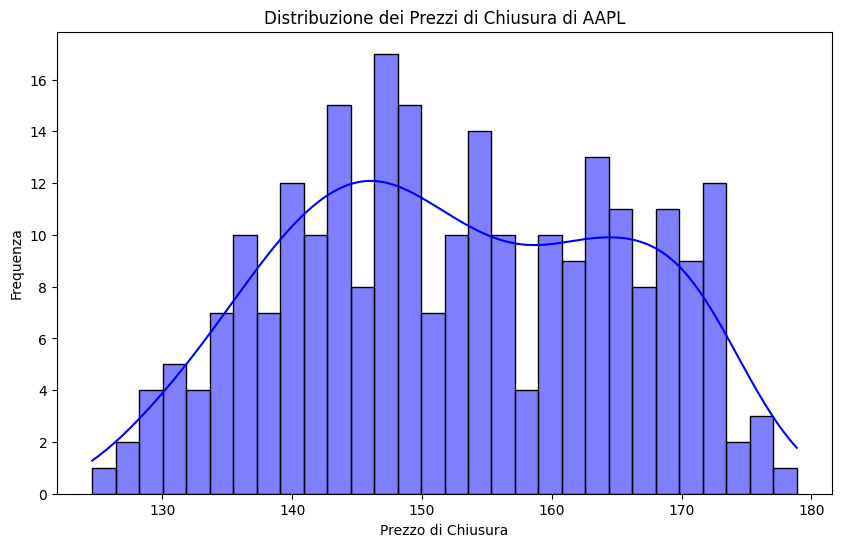

In [15]:
# Distribuzione dei prezzi di chiusura
plt.figure(figsize=(10, 6))
sns.histplot(data['Close'], kde=True, bins=30, color='blue')
plt.title('Distribuzione dei Prezzi di Chiusura di AAPL')
plt.xlabel('Prezzo di Chiusura')
plt.ylabel('Frequenza')
plt.show()

## 4. Analisi dei Rendimenti

I rendimenti sono una metrica fondamentale nel trading algoritmico. Calcoliamo i rendimenti semplici e logaritmici.

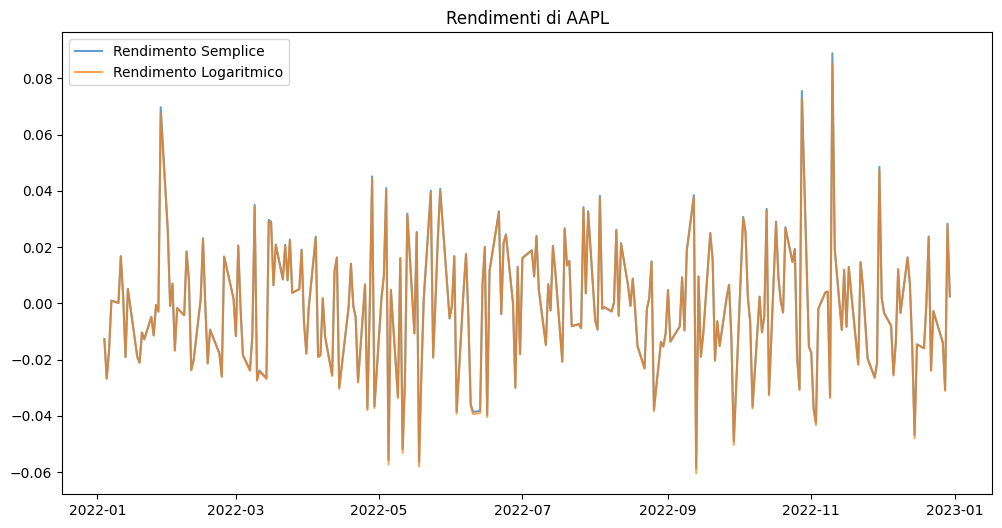

In [18]:
# Calcolo dei rendimenti semplici
data['Simple_Return'] = data['Close'].pct_change()

# Calcolo dei rendimenti logaritmici
data['Log_Return'] = np.log(data['Close'] / data['Close'].shift(1))

# Visualizzazione dei rendimenti
plt.figure(figsize=(12, 6))
plt.plot(data['Simple_Return'], label='Rendimento Semplice', alpha=0.7)
plt.plot(data['Log_Return'], label='Rendimento Logaritmico', alpha=0.7)
plt.title('Rendimenti di AAPL')
plt.legend()
plt.show()

## 5. Analisi della Volatilità

La volatilità è una misura del rischio associato a un asset. Calcoliamo la deviazione standard dei rendimenti e utilizziamo una media mobile per smussare la volatilità.

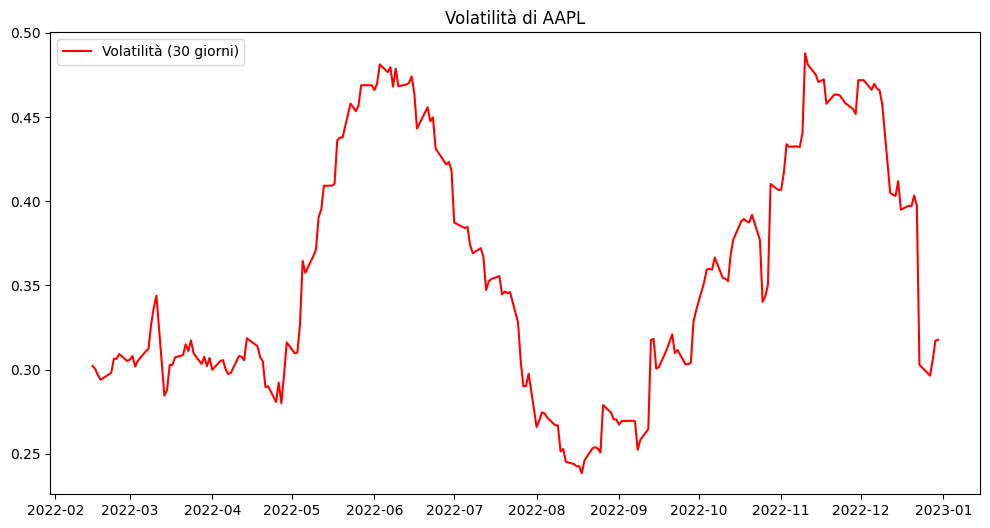

In [19]:
# Calcolo della volatilità (deviazione standard dei rendimenti)
data['Volatility'] = data['Log_Return'].rolling(window=30).std() * np.sqrt(252)  # Annualizzata

# Visualizzazione della volatilità
plt.figure(figsize=(12, 6))
plt.plot(data['Volatility'], label='Volatilità (30 giorni)', color='red')
plt.title('Volatilità di AAPL')
plt.legend()
plt.show()

## 6. Identificazione di Outlier

Utilizziamo il metodo dell'intervallo interquartile (IQR) per identificare outlier nei rendimenti.

In [20]:
# Calcolo dell'IQR per i rendimenti logaritmici
Q1 = data['Log_Return'].quantile(0.25)
Q3 = data['Log_Return'].quantile(0.75)
IQR = Q3 - Q1

# Identificazione degli outlier
outliers = data[(data['Log_Return'] < (Q1 - 1.5 * IQR)) | (data['Log_Return'] > (Q3 + 1.5 * IQR))]
print("Outlier nei rendimenti logaritmici:")
print(outliers[['Close', 'Log_Return']])

Outlier nei rendimenti logaritmici:
                 Close  Log_Return
Date                              
2022-01-28  167.400787    0.067451
2022-09-13  151.820023   -0.060471
2022-10-28  153.695053    0.072834
2022-11-10  145.181961    0.085236


## 7. Analisi della Correlazione

La correlazione tra variabili è utile per comprendere le relazioni tra asset o indicatori. Creiamo una heatmap della correlazione.

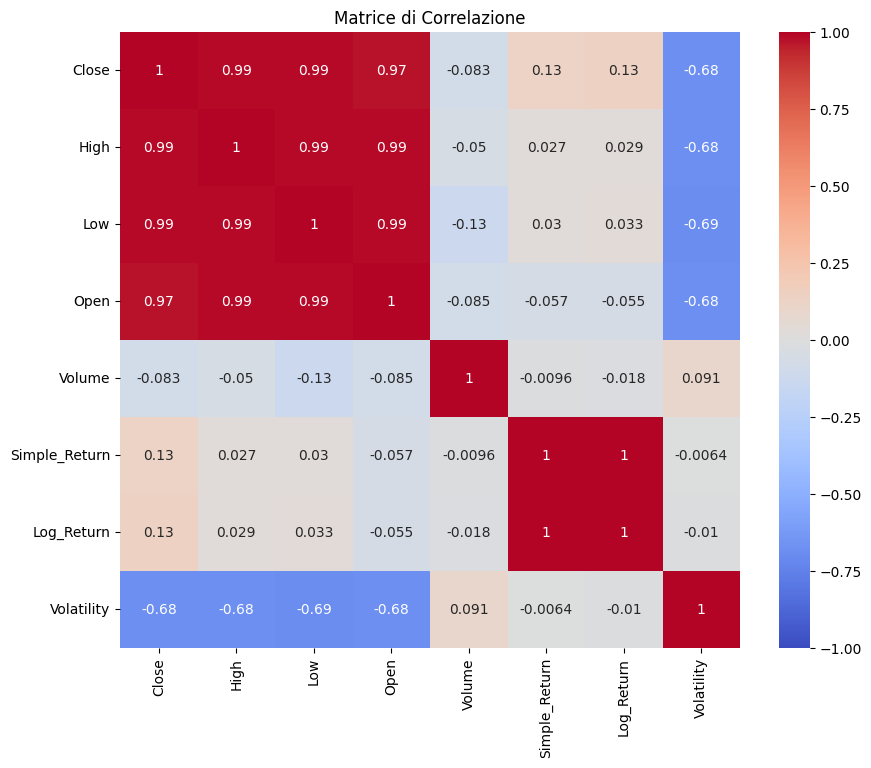

In [21]:
# Matrice di correlazione
corr_matrix = data.corr()

# Heatmap della correlazione
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matrice di Correlazione')
plt.show()

## 8. Feature Engineering

Il feature engineering è cruciale per il trading algoritmico. Creiamo nuove feature come medie mobili, RSI e MACD.

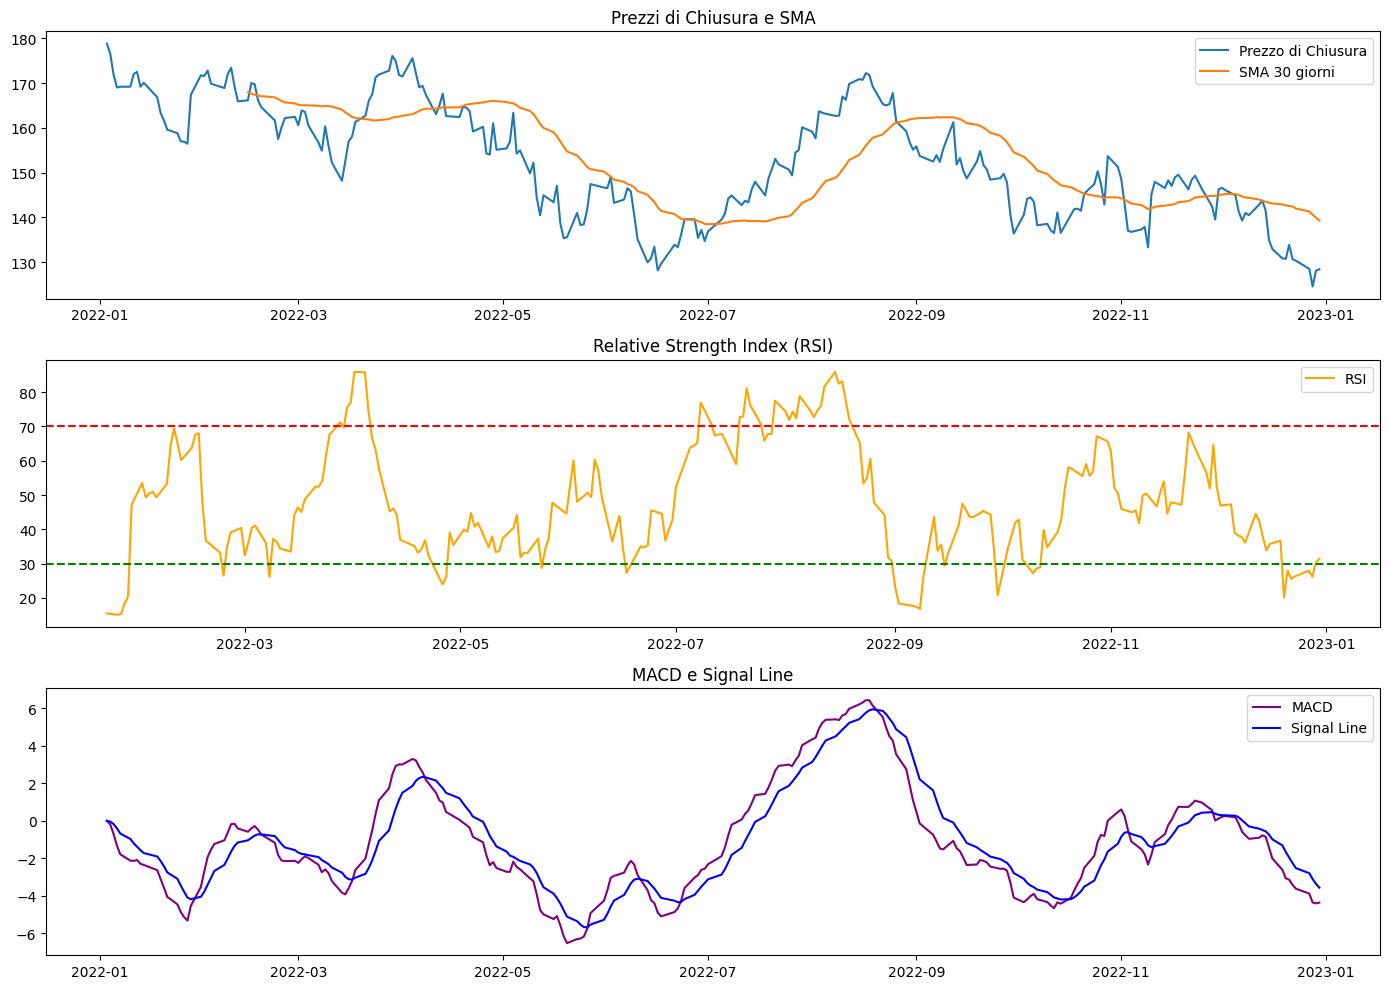

In [22]:
# Calcolo della media mobile semplice (SMA)
data['SMA_30'] = data['Close'].rolling(window=30).mean()

# Calcolo del Relative Strength Index (RSI)
delta = data['Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
data['RSI'] = 100 - (100 / (1 + rs))

# Calcolo del MACD
data['EMA_12'] = data['Close'].ewm(span=12, adjust=False).mean()
data['EMA_26'] = data['Close'].ewm(span=26, adjust=False).mean()
data['MACD'] = data['EMA_12'] - data['EMA_26']
data['Signal_Line'] = data['MACD'].ewm(span=9, adjust=False).mean()

# Visualizzazione delle nuove feature
plt.figure(figsize=(14, 10))
plt.subplot(3, 1, 1)
plt.plot(data['Close'], label='Prezzo di Chiusura')
plt.plot(data['SMA_30'], label='SMA 30 giorni')
plt.title('Prezzi di Chiusura e SMA')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(data['RSI'], label='RSI', color='orange')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.title('Relative Strength Index (RSI)')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(data['MACD'], label='MACD', color='purple')
plt.plot(data['Signal_Line'], label='Signal Line', color='blue')
plt.title('MACD e Signal Line')
plt.legend()

plt.tight_layout()
plt.show()

## 9. Analisi della Stagionalità

Identifichiamo eventuali pattern stagionali nei dati utilizzando la decomposizione temporale.

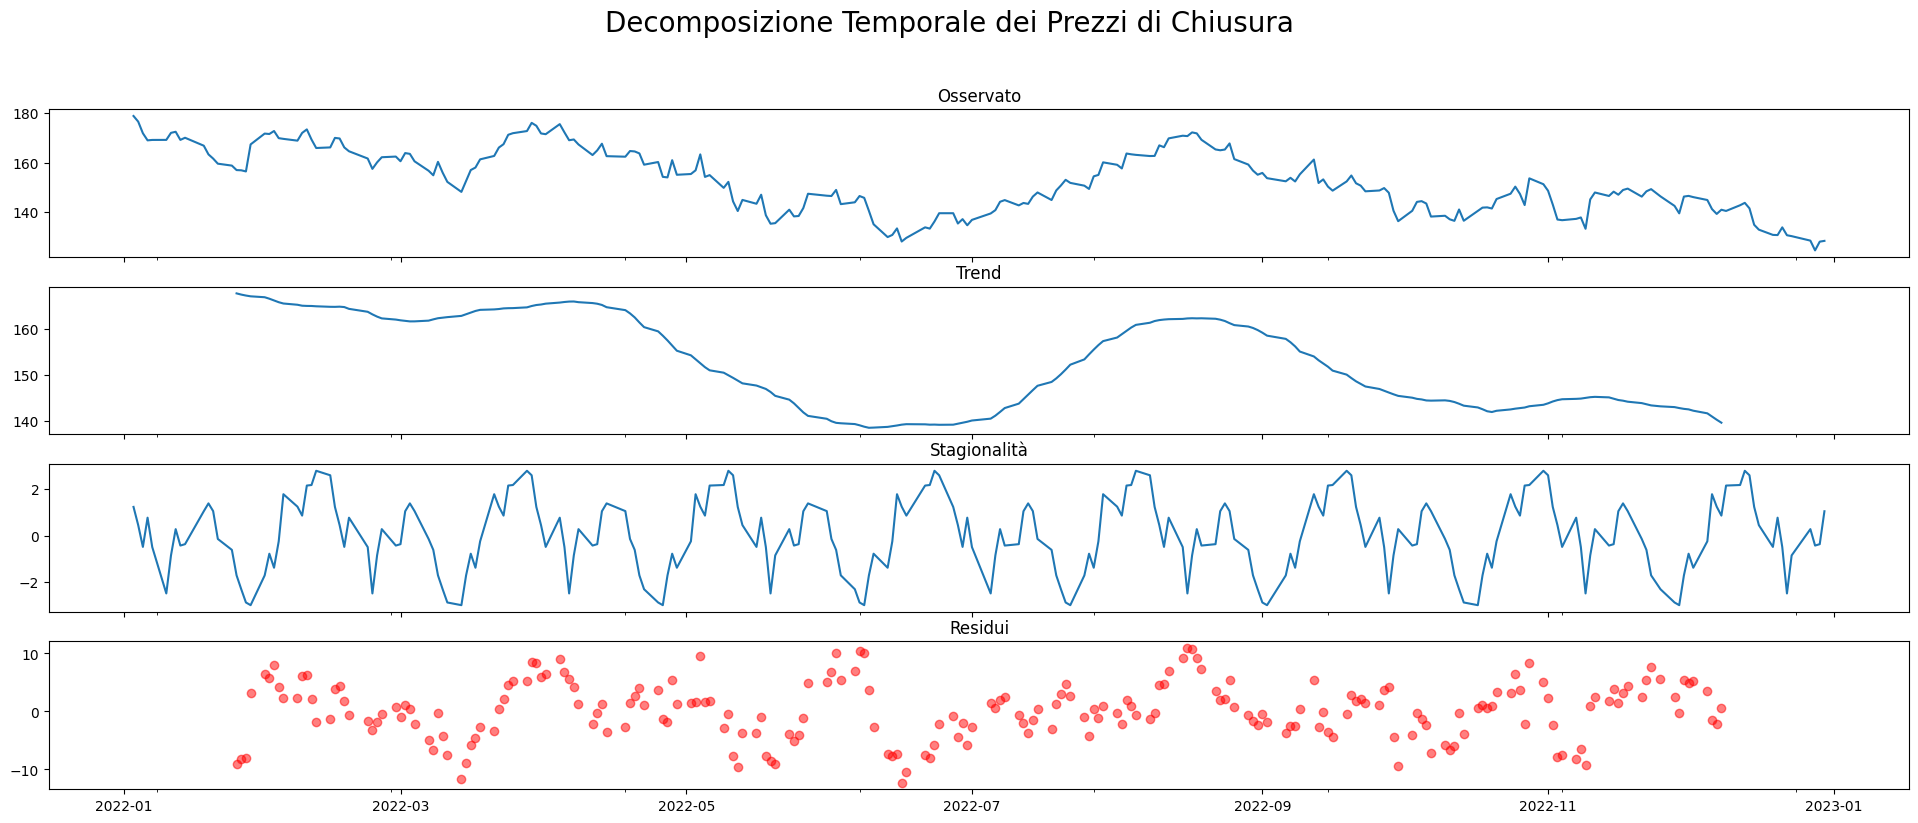

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decomposizione temporale
decomposition = seasonal_decompose(data['Close'], period=30, model='additive')

# Creazione di una figura grande
fig, axes = plt.subplots(4, 1, figsize=(24, 10), sharex=True)  # 4 righe, 1 colonna

# Disegnare i singoli componenti
decomposition.observed.plot(ax=axes[0], legend=False, title="Osservato")
decomposition.trend.plot(ax=axes[1], legend=False, title="Trend")
decomposition.seasonal.plot(ax=axes[2], legend=False, title="Stagionalità")

# Scatter plot per i residui
axes[3].scatter(data.index, decomposition.resid, alpha=0.5, color='red')
axes[3].set_title("Residui")

plt.suptitle('Decomposizione Temporale dei Prezzi di Chiusura', fontsize=20)
plt.show()

## 10. Analisi dei Cluster

Utilizziamo il clustering per identificare gruppi di giorni con caratteristiche simili.

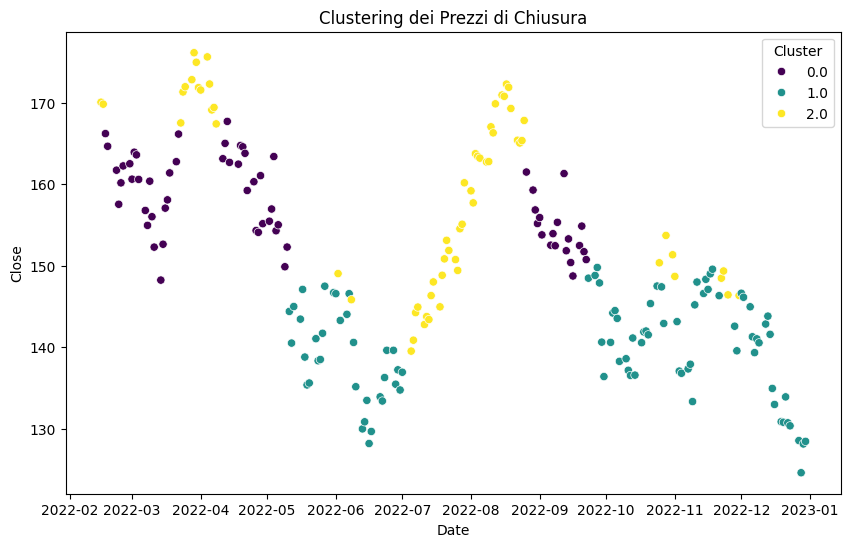

In [35]:
from sklearn.cluster import KMeans

# Selezione delle feature per il clustering
features = data[['Close', 'Volatility', 'RSI']].dropna()

# Applicazione del K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(features)

# Creare una colonna "Cluster" inizialmente vuota
data['Cluster'] = None  

# Assegnare i cluster SOLO alle righe senza NaN
data.loc[features.index, 'Cluster'] = clusters

# Convertire la colonna Cluster in numerico (NaN rimarranno NaN)
data['Cluster'] = pd.to_numeric(data['Cluster'])

# Visualizzazione dei cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data.index, y=data['Close'], hue=data['Cluster'], palette='viridis')
plt.title('Clustering dei Prezzi di Chiusura')
plt.show()

## Conclusione

In questo notebook, abbiamo eseguito un'analisi esplorativa completa dei dati finanziari, focalizzandoci su statistiche descrittive, distribuzioni, rendimenti, volatilità, correlazioni e feature engineering. I dati sono ora pronti per essere utilizzati nello sviluppo di strategie di trading algoritmico.